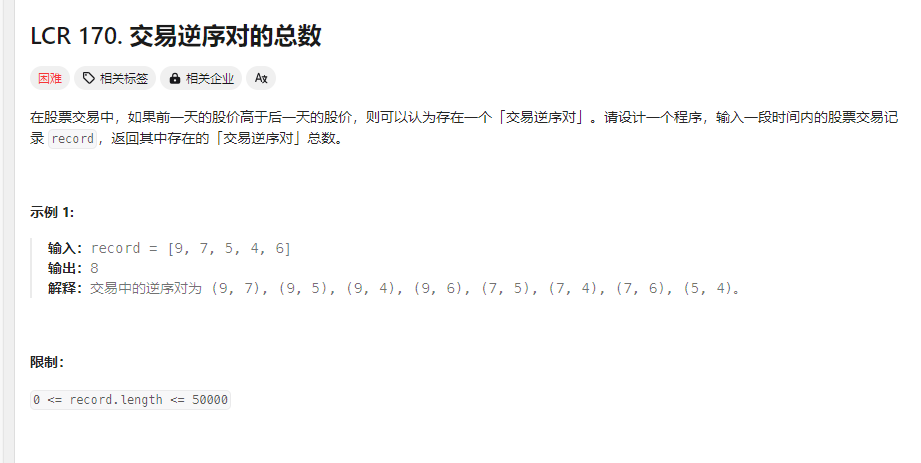

## 思路
# 冒泡泡排序中交换的次数



In [2]:
from typing import List

class Solution:
    def reversePairs(self, record: List[int]) -> int:
        res = 0
        for i in range(len(record)):
            j = 0
            while j < len(record) - i - 1:
                if record[j] > record[j + 1]:
                    record[j], record[j + 1] = record[j + 1], record[j]
                    res += 1
                j += 1
        return res
    
a = Solution()
a.reversePairs([9, 7, 5, 4, 6])
                

8

# 上面的超时了。。。

# 归并排序
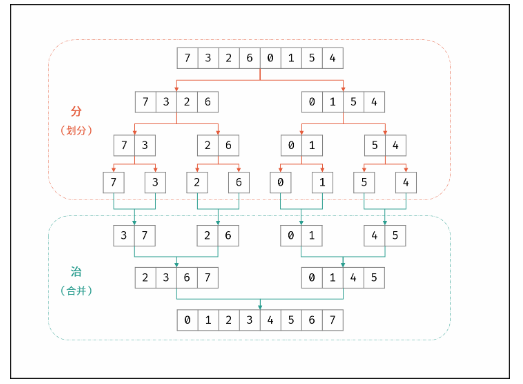

## 当查询左右两个数组进行归并的时候如果出现了右边的较小先排入了，相当于左边尚未归并的元素都比右边的该元素大，因此构成了逆序对，所以需要在右边元素归入的时候统计
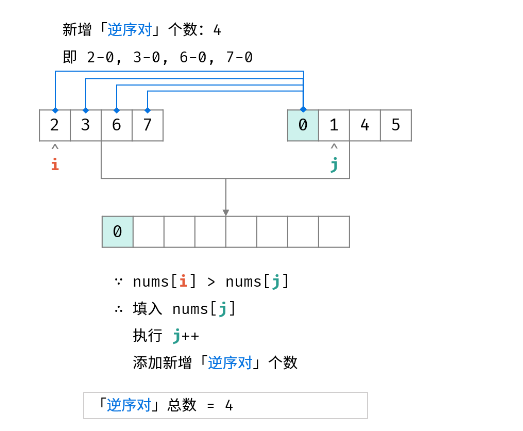

In [12]:
# 普通归并排序

class mergesort_try():
    def mergesort(self, nums):
        # 当划分到最小的数组（只有一个元素）的时候就直接返回
        if len(nums) <= 1:
            return nums
        
        # 如果还有好几个那就继续划分
        mid = len(nums) // 2
        right_array = self.mergesort(nums[0:mid])  # 切片不包括终点 mid
        left_array = self.mergesort(nums[mid:])
        return self.merge(left_array, right_array)
    
    # 上面是划分下面就是归并了
    def merge(self, left_nums, right_nums):
        # 归并的总步骤就是有两个指针同时移动然后比较大小，再将结果放到临时创建的res数组中去
        size = len(left_nums) + len(right_nums)
        temp = size * [0]
        i, j, index = 0, 0, 0
        while i < len(left_nums) and j < len(right_nums):
            if left_nums[i] < right_nums[j]:
                temp[index] = left_nums[i]
                index += 1
                i += 1
            else:
                temp[index] = right_nums[j]
                index += 1
                j += 1
        # 下面就是将未添加完全的剩余部分都加上
        while i < len(left_nums):
            temp[index] = left_nums[i]
            index += 1
            i += 1
        while j < len(right_nums):
            temp[index] = right_nums[j]
            index += 1
            j += 1
        return temp
    
a = mergesort_try()
array = [3,2,1]
res = a.mergesort(array)   # 这是因为在切片的过程中创建的原来列表的副本而不是在原位修改
print(res)


[1, 2, 3]


In [24]:
from typing import List
# 使用上述的思路来解决

# 要注意整数不是引用而是副本 所以可以使用列表来保持引用
class mergesort_try():
    def mergesort(self, nums, res):
        # 当划分到最小的数组（只有一个元素）的时候就直接返回
        if len(nums) <= 1:
            return nums
        
        # 如果还有好几个那就继续划分
        mid = len(nums) // 2
        right_array = self.mergesort(nums[mid:], res)  # 切片不包括终点 mid
        left_array = self.mergesort(nums[0:mid], res)
        return self.merge(left_array, right_array, res)
    
    # 上面是划分下面就是归并了
    def merge(self, left_nums, right_nums, res):
        # 归并的总步骤就是有两个指针同时移动然后比较大小，再将结果放到临时创建的res数组中去
        sizel = len(left_nums)
        sizer = len(right_nums)
        size = sizel + sizer
        temp = size * [0]
        i, j, index = 0, 0, 0
        while i < len(left_nums) and j < len(right_nums):
            if left_nums[i] <= right_nums[j]:  # 这个等号很奇怪感觉要不要都行，但是统计的时候会有区别
                temp[index] = left_nums[i]
                index += 1
                i += 1
            else:
                temp[index] = right_nums[j]
                index += 1
                j += 1
                res[0] += sizel - i
        # 下面就是将未添加完全的剩余部分都加上
        while i < len(left_nums):
            temp[index] = left_nums[i]
            index += 1
            i += 1
        while j < len(right_nums):
            temp[index] = right_nums[j]
            index += 1
            j += 1
        return temp
    
    def reversePairs(self, record: List[int]) -> int:
        res = [0]
        self.mergesort(record, res)
        return res[0]

a = mergesort_try()
print(a.reversePairs([7,5,6,4]))


5
